In [52]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Chapter 2 - housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [53]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [54]:
df = df.dropna()

<Axes: xlabel='ocean_proximity'>

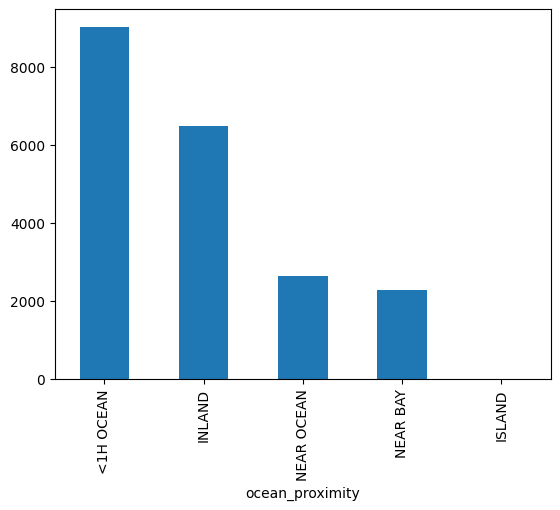

In [55]:
df.ocean_proximity.value_counts().plot(kind = 'bar')

In [56]:
df['income_cat'] = pd.cut(df['median_income'],
                          bins = [0.,1.5,3.0,4.5,6.,np.inf],
                          labels = [1,2,3,4,5]
                          )
df['income_cat'].value_counts()

income_cat
3    7156
2    6515
4    3611
5    2337
1     814
Name: count, dtype: int64

<Axes: xlabel='income_cat'>

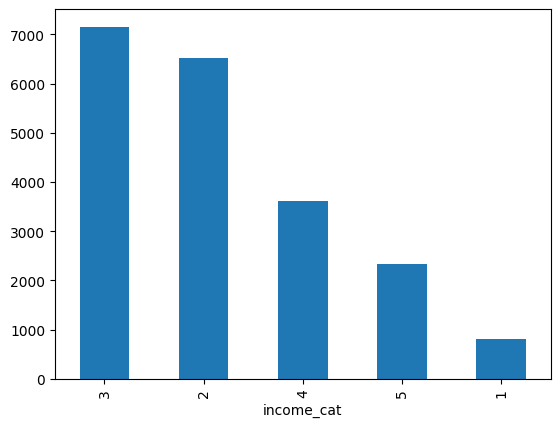

In [57]:
df['income_cat'].value_counts().plot(kind = 'bar')

In [58]:
y = df['median_house_value']
x = df.drop(columns = ['median_house_value'])

In [59]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state=42)

In [60]:
x_train = x_train.drop(columns = ['income_cat'])
x_test = x_test.drop(columns = ['income_cat'])

In [61]:
x_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity'],
      dtype='object')

In [62]:
x_train['ocean_proximity'].unique()

array(['NEAR OCEAN', 'INLAND', '<1H OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [63]:
column_names = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND']

In [64]:
scaling_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
ohe_feature = ['ocean_proximity']

In [65]:
x_train = pd.get_dummies(x_train,columns = ohe_feature,drop_first = True,dtype = np.int32)

In [66]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
5652,-118.29,33.73,21.0,2492.0,711.0,1699.0,672.0,2.1382,0,0,0,1
12313,-116.57,33.64,10.0,489.0,82.0,183.0,74.0,6.2702,1,0,0,0
2340,-119.67,36.81,4.0,1262.0,216.0,622.0,199.0,4.9432,1,0,0,0
12433,-116.01,33.51,24.0,2985.0,958.0,4042.0,905.0,1.7344,1,0,0,0
13507,-117.33,34.13,30.0,2335.0,363.0,1214.0,311.0,2.2449,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,0,0,0,0
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,0,0,0,0
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,0,0,0,0
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,0,0,1,0


In [67]:
x_test = pd.get_dummies(x_test,columns = ohe_feature,drop_first = True,dtype = np.int32)

In [68]:
all_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

trf1 = ColumnTransformer(transformers = [
    ('scaler',StandardScaler(),scaling_features)
])

In [70]:
x_train_transformed = trf1.fit_transform(x_train)
x_test_transformed = trf1.transform(x_test)

In [71]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_transformed,y_train)

LinearRegression()

In [72]:
y_pred = lr.predict(x_test_transformed)
y_pred

array([197402.58659162, 157886.4812097 , 203530.72058671, ...,
       209291.92512045,  81232.13286859, 291613.5571111 ])

In [73]:
rounded = np.round(y_pred)

In [77]:
from sklearn.metrics import r2_score

score = r2_score(y_test,rounded)*100
score

64.73836691632641

In [80]:
scaler_y = StandardScaler()

y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)

In [81]:
lr.fit(x_train_transformed,y_train_scaled)

LinearRegression()

In [82]:
y_pred_new = lr.predict(x_test_transformed)

In [83]:
predicted_values = scaler_y.inverse_transform(y_pred_new.reshape(-1, 1))

In [99]:
y_pred_ = predicted_values

In [106]:
score_new = r2_score(y_pred_new,y_test_scaled)*100

In [107]:
score_new

42.6464994433967